# Building a contact sheet of images of varied brightness.   
9 copies of the same image are made with different brightness levels, and pasted on a contact sheet as below in the increasing order of their brightness.

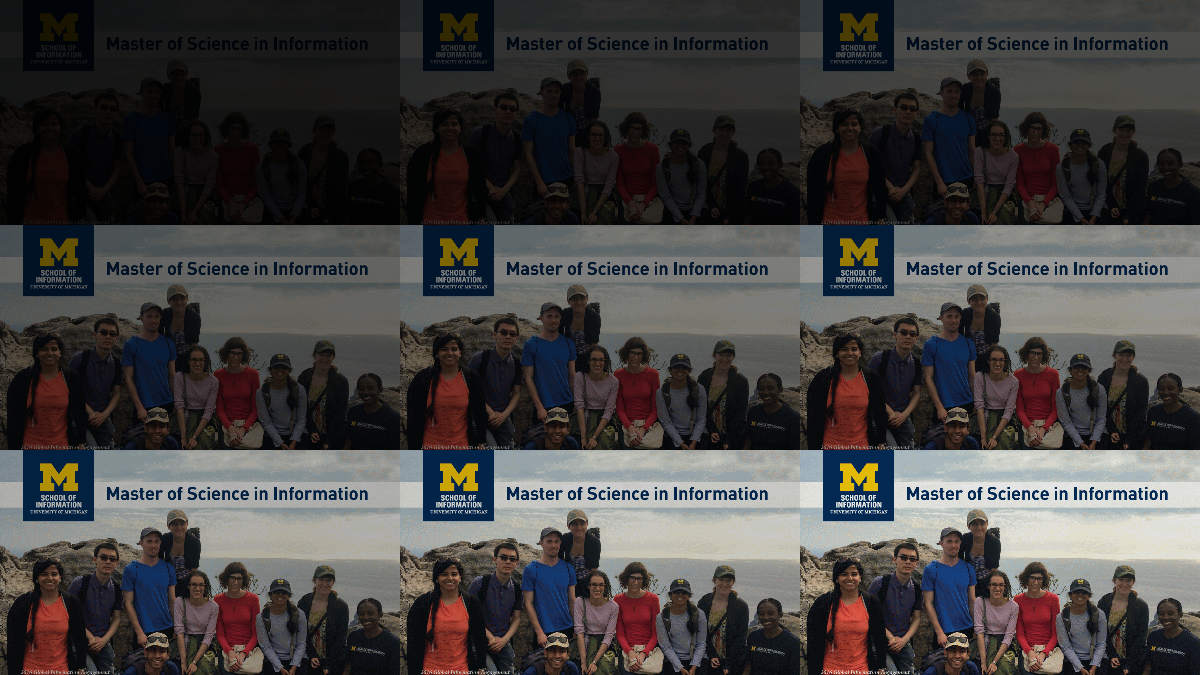

In [1]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

# Building a contact sheet of images with varied Red-Blue-Green (RGB) component ratios.
In the first row the Red channel intensity is 0.10, 0.50 and 0.90 as compared to other channels, for the images from left to right.  
Similarly in the second row and third row of the contact sheet, the Green channel and Blue channel of the image respectively are varied by the same amount mentioned above.

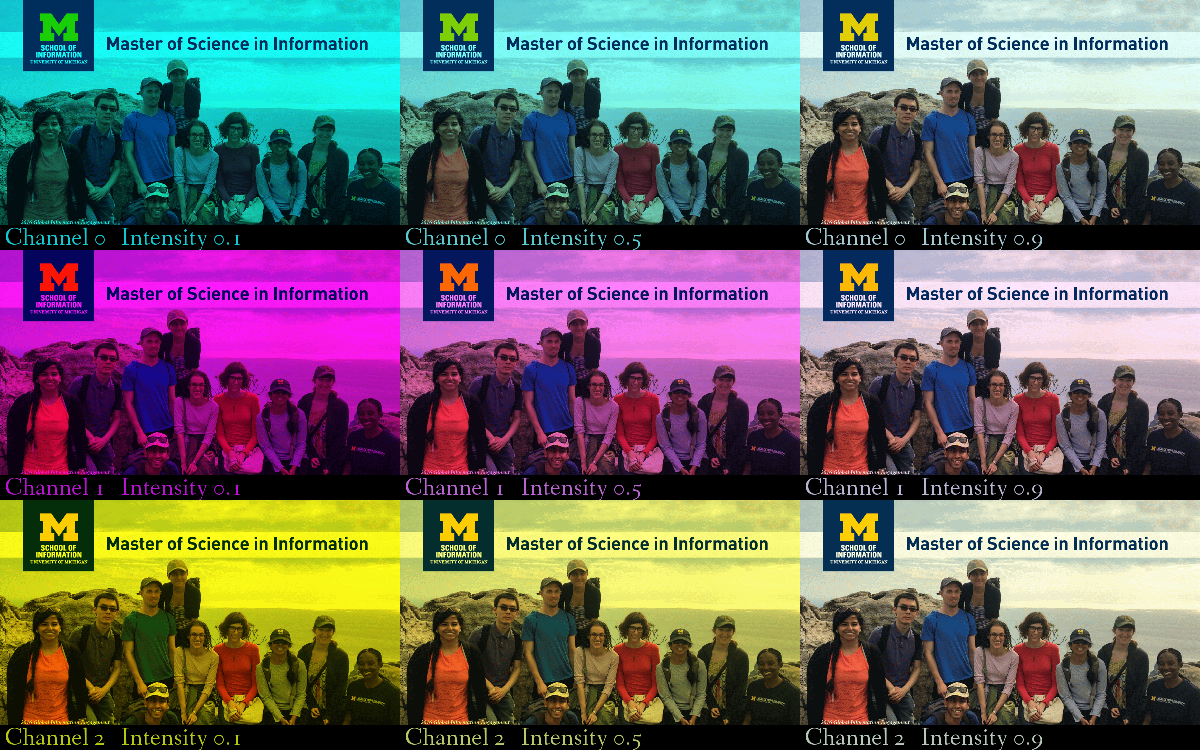

In [2]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw, ImageFont

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# splitting the image to red, green and blue channels
r, g, b = image.split()


img1 = []
img2 = []
img3 =[]
lst = [0.1,0.5,0.9]
font = ImageFont.truetype("readonly/fanwood-webfont.ttf", 50)

for n in lst:
    r1 = r.point(lambda i:i *n)
    result = Image.merge("RGB", (r1, g,b))
    img1.append(result)
    # creating a new image and writing the text on it. 
    new  = Image.new( mode = "RGB", size = (image.width, 50) )
    draw = ImageDraw.Draw(new)
    draw.text((10,5), text = f'Channel 0   Intensity {n}', font = font, fill =result.getpixel((10,50)))
    img1.append(new)
# reordering the list
img1 = img1[0 :5 :2] + img1[1:6:2]

    
for n in lst:
    g1 = g.point(lambda i : i *n)
    result = Image.merge("RGB",(r,g1,b))
    img2.append(result)
    new  = Image.new( mode = "RGB", size = (image.width, 50) )
    draw = ImageDraw.Draw(new)
    draw.text((10,5), text = f'Channel 1   Intensity {n}', font = font, fill = result.getpixel((10,50)))
    img2.append(new)
img2 = img2[0 :5 :2] + img2[1:6:2]
    

for n in lst:
    b1 = b.point(lambda i: i*n)
    result = Image.merge("RGB",(r,g,b1))
    img3.append(result)
    new  = Image.new( mode = "RGB", size = (image.width, 50) )
    draw = ImageDraw.Draw(new)
    draw.text((10,5), text = f'Channel 2   Intensity {n}', font = font, fill = result.getpixel((10,50)))
    img3.append(new)
img3 =img3[0 :5 :2] + img3[1:6:2] 

# The list of all the images (18 in total)
img = img1 +img2 +img3 


# create a contact sheet 
first_image=img[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,(first_image.height+50)*3))
x=0
y=0

for img in img:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+img.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)